<a href="https://colab.research.google.com/github/OoMyGit/Data-Mining/blob/main/%5BAnswer%5D_Exercise_Week_8_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [2]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


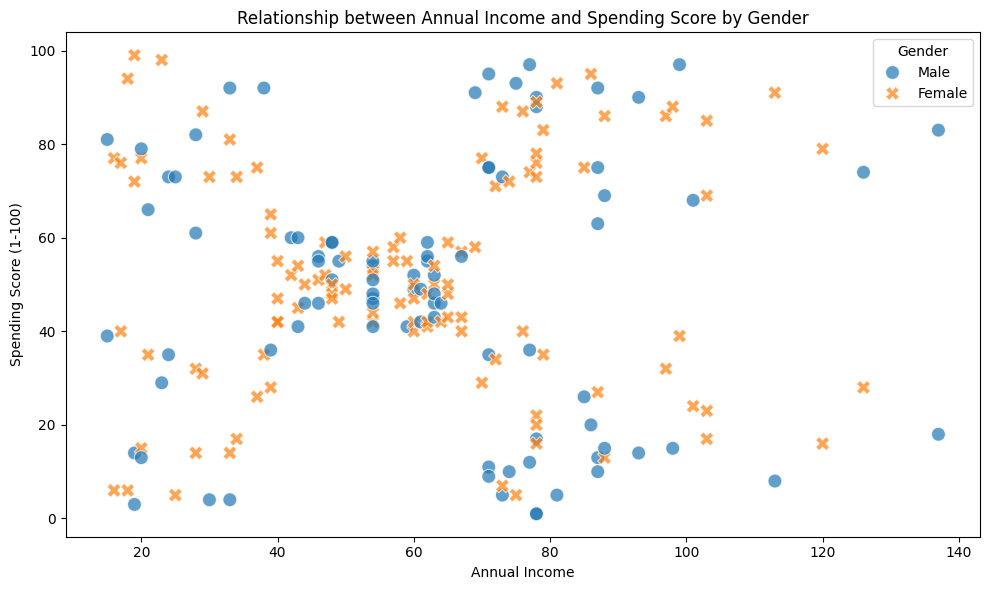

In [6]:
# make an insightful visualization and explain

# Scatter plot for Annual Income vs. Spending Score by Gender
plt.figure(figsize=(10, 6))

# Scatter plot for each gender
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Gender', style='Gender', s=100, alpha=0.7)

# Title and labels
plt.title('Relationship between Annual Income and Spending Score by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

# Show legend and plot
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


# Annual Income Distribution by Gender:
# The median annual income for both males and females is around 65 for males and 62 for females.
# The interquartile range (IQR) for males is approximately from 45 to 80, while for females it is from 42 to 78.
# There are a few outliers for males but none for females.

# Spending Score Distribution by Gender:
# Both males and females have a median spending score around 50.
# The IQR for males is from 35 to 70, and for females from 35 to 75.

## Data Preprocessing

For this case study, we only use income and spending score

In [7]:
# create new dataframe that consist only annual income and spending score
dfnew = df[['AnnualIncome', 'SpendingScore']]
dfnew.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [8]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_scaled = standard_scaler.fit_transform(dfnew)

df_new_scaled = pd.DataFrame(df_scaled, columns=dfnew.columns)
df_new_scaled.rename(columns={'AnnualIncome': 'income', 'SpendingScore': 'spending'}, inplace=True)

# Show the first few rows
df_new_scaled.head()

,income,spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [9]:
# get stastical information on the new dataset
df_new_scaled.describe()

,income,spending
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

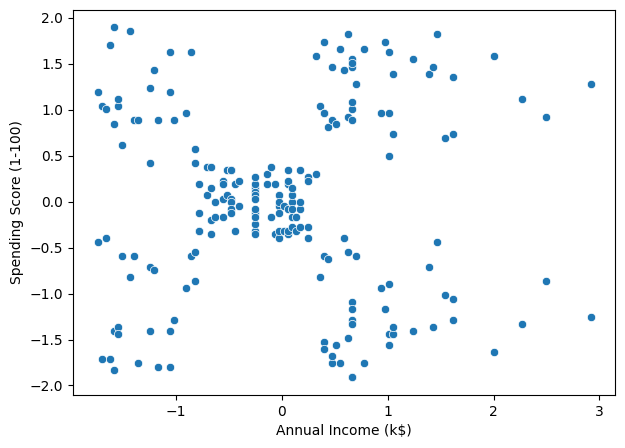

In [10]:
# Visualize the position
plt.figure(figsize=(7, 5))
plt.scatter(df_new_scaled['income'], df_new_scaled['spending'], edgecolor='white', linewidth=0.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

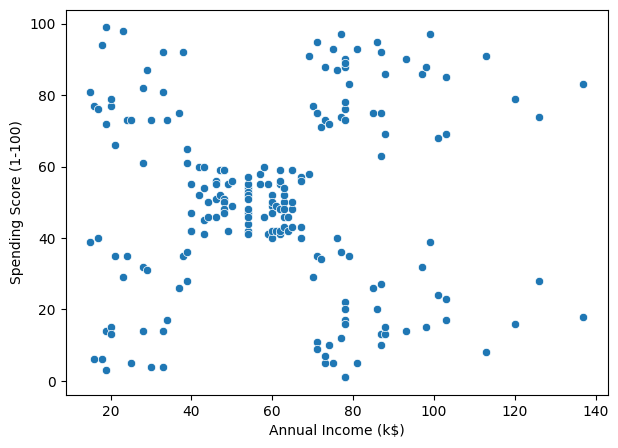

In [11]:
# Visualize the position using the original scale
plt.figure(figsize=(7, 5))
plt.scatter(dfnew['AnnualIncome'], dfnew['SpendingScore'], edgecolor='white', linewidth=0.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [12]:
# set the parameter for evaluating K
sse=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_new_scaled)
    sse.append(kmeans.inertia_)


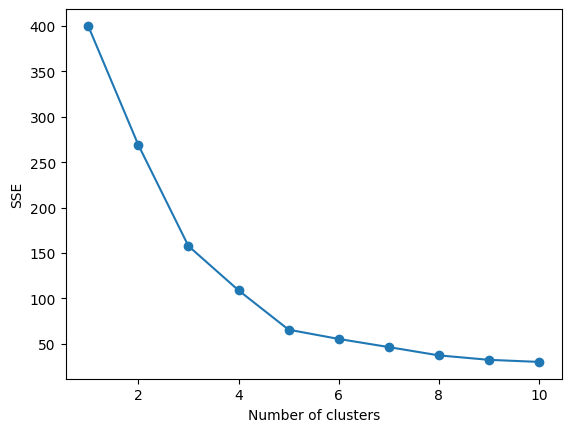

In [19]:
# manually visualize the elbow method using plotlib
plt.plot(range(1,11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [14]:
# using kneelocator to find the elbow/knee
kl = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
print("The best k for your model is", kl.elbow)


The best k for your model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [15]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_new_scaled)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

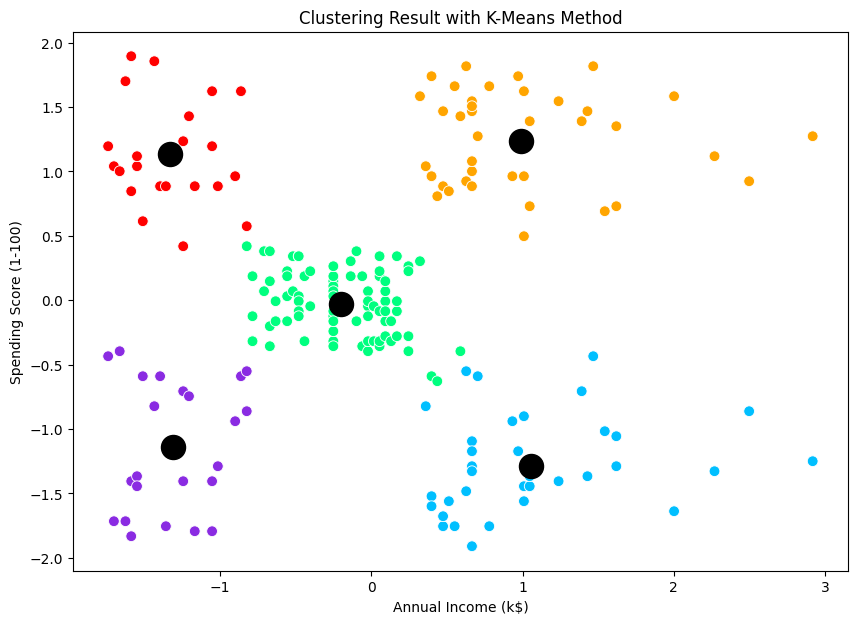

In [16]:
# visualize the result using scater chart
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_new_scaled, x='income', y='spending', hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"], s=60, legend=None)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=300)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Result with K-Means Method')
plt.show()

In [17]:
# Inverse transform the scaled data to get the original values
dfinverse = pd.DataFrame(standard_scaler.inverse_transform(df_new_scaled), columns=df_new_scaled.columns)
dfinverse.rename(columns={'income': 'AnnualIncome', 'spending': 'SpendingScore'}, inplace=True)
dfinverse['Cluster'] = y_pred
dfinverse.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [18]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = dfinverse.groupby(y_pred).agg({'SpendingScore': ['mean', 'std', 'min', 'max'], 'AnnualIncome': ['mean', 'std', 'min', 'max']})
cluster_summary = cluster_summary.rename_axis('Cluster')
cluster_summary

SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
Cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
Cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

### Interpretation of Clustering Results:

#### Cluster 0:
- SpendingScore: Mean = 20.91, Range = [3.0, 40.0]
- AnnualIncome: Mean = 26.30, Range = [15.0, 39.0]

Cluster 0 consists of customers with lower SpendingScores and moderate annual incomes. These customers are likely more price-sensitive and conservative in their spending.

#### Cluster 1:
- SpendingScore: Mean = 79.36, Range = [61.0, 99.0]
- AnnualIncome: Mean = 25.73, Range = [15.0, 39.0]

Cluster 1 has high SpendingScores despite having moderate annual incomes. These customers may be willing to prioritize spending on certain goods or luxury items, indicating potential brand loyalty or a strong preference for specific product categories.

#### Cluster 2:
- SpendingScore: Mean = 17.11, Range = [1.0, 39.0]
- AnnualIncome: Mean = 88.20, Range = [70.0, 137.0]

Cluster 2 includes high-income individuals but with lower SpendingScores. These customers may have greater financial flexibility but are more selective or cautious with their spending.

#### Cluster 3:
- SpendingScore: Mean = 82.13, Range = [63.0, 97.0]
- AnnualIncome: Mean = 86.54, Range = [69.0, 137.0]

Cluster 3 shows high-income individuals with very high SpendingScores. This group represents your most lucrative customers, who are both wealthy and tend to spend a lot. They may be highly receptive to premium or luxury offerings.

#### Cluster 4:
- SpendingScore: Mean = 49.52, Range = [34.0, 61.0]
- AnnualIncome: Mean = 55.30, Range = [39.0, 76.0]

Cluster 4 consists of mid-income customers with moderate spending. This group is likely to respond well to targeted marketing or special offers aimed at encouraging higher spending.



-------------------------------------------------------------------------



### Suggestions for Company Actions Based on Clustering Results:

1. **For Cluster 0 (Low Income, Low Spending):**
   - Targeting: Focus on value-driven offers or budget-friendly product lines.
   - Promotions: Introduce discount-based promotions or loyalty programs that encourage higher spending.

2. **For Cluster 1 (Moderate Income, High Spending)**:
   - Targeting: Emphasize quality, unique selling points, and premium offerings that resonate with their willingness to spend more.
   - Engagement: Introduce exclusive products or services that make them feel valued, such as VIP memberships or early access to new products.

3. **For Cluster 2 (High Income, Low Spending)**:
   - Targeting: Focus on creating a strong emotional connection to the brand, highlighting exclusivity or status-symbol products.
   - Incentives: Offer personalized services or luxury experiences to encourage spending without being too aggressive on price.

4. **For Cluster 3 (High Income, High Spending)**:
   - Targeting: Cater to their preferences with luxury products and premium customer experiences.
   - Upselling: Focus on personalized, high-value offerings like limited-edition products, high-end packages, or concierge services.

5. **For Cluster 4 (Mid Income, Moderate Spending)**:
   - Targeting: Use targeted promotions to boost spending, such as cross-selling or bundling related products.
   - Retention: Introduce subscription models or tiered loyalty programs to gradually increase their spending behavior.

Overall, the company should focus on tailoring marketing efforts based on the distinct behaviors and characteristics of each cluster to maximize sales and customer satisfaction.


<write here>